<a href="https://colab.research.google.com/github/Rohan20202/Cardiovascular-Risk-Prediction-Project/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cardiovascular Risk Prediction Project**

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.**

**Variables**

**Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.**

**Data Description :**

**Demographic:**

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

**Behavioral :**

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

**Medical( history)**


• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

**•Predict variable (desired target)**

10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
Dv 

**Connecting the drive**

In [1]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Libraries**

In [2]:
#loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno as mno

**Loading the dataset**

In [3]:
#loading the given dataset
data = pd.read_csv('/content/drive/MyDrive/Caridovascular Risk prediction/data_cardiovascular_risk.csv')

In [4]:
#first 5 rows of data
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#shape and of the dataset
data.shape

(3390, 17)

In [6]:
#all the columns in the dataset
data.columns


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
#the number of unique values that each column contains
data.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [8]:
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
#showing the datatype of all features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

**Data Cleaning**

**Checking for null values**

In [10]:
pd.DataFrame(data.isna().sum(),columns=['records missings']).T

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
records missings,0,0,87,0,0,22,44,0,0,0,38,0,0,14,1,304,0


In [11]:
data.dropna(axis = 0, inplace = True) 
print(data.shape)

(2927, 17)


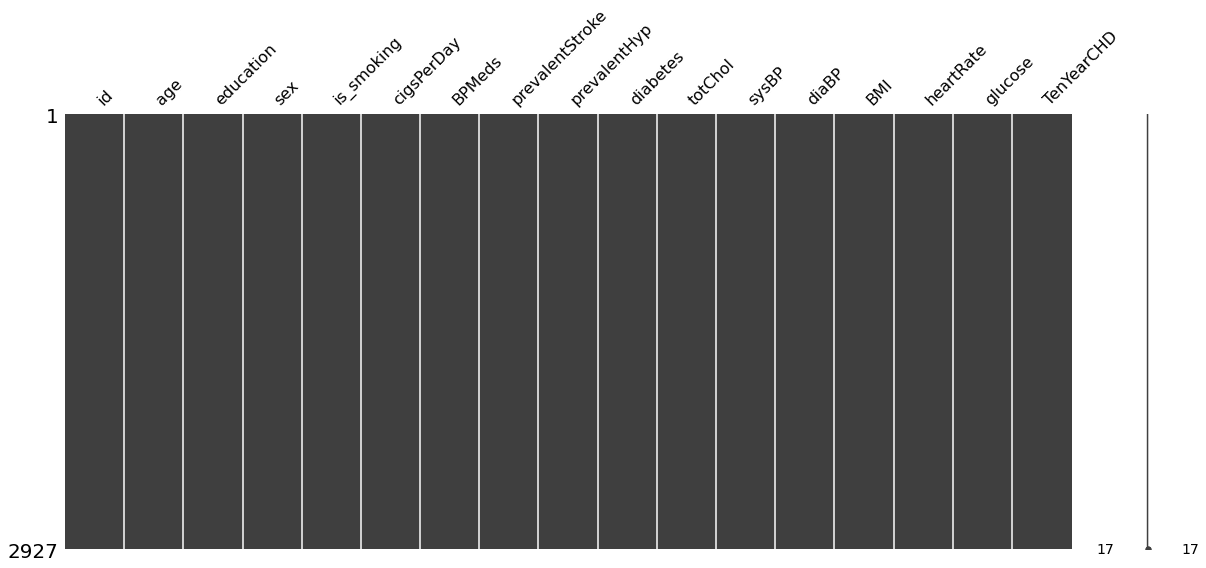

In [12]:
#checking for nan values
mno.matrix(data,figsize=(20,8))

**Data Visualization**

**Seprate dependent and independent variables**

In [13]:
dependent_variable = 'TenYearCHD'

In [14]:
independent_variables = list(set(data.columns.tolist()) - {dependent_variable})
independent_variables

['sysBP',
 'heartRate',
 'diabetes',
 'cigsPerDay',
 'id',
 'prevalentStroke',
 'BPMeds',
 'BMI',
 'sex',
 'prevalentHyp',
 'education',
 'glucose',
 'totChol',
 'age',
 'diaBP',
 'is_smoking']

In [15]:
# Divide the columns based on the type for clear management
col_Demographic = [ 'age', 'education', 'sex']

col_Behavioral = ['is_smoking', 'cigsPerDay']

col_medical_history = ['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

col_medical_current = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

col_target = ['TenYearCHD']

In [16]:
independent_vars = data[col_Demographic + col_Behavioral + col_medical_history + col_medical_current]
dependent_vars = data[col_target]

In [17]:
independent_vars.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,49.507345,1.965494,9.112743,0.030065,0.006150,0.314315,0.026990,237.129142,132.626409,82.906218,25.797041,75.888282,81.934404,237.129142,132.626409,82.906218,25.797041,75.888282,81.934404
std,8.597191,1.017199,11.882784,0.170795,0.078192,0.464322,0.162082,44.613282,22.326197,12.078873,4.130376,11.971207,24.106943,44.613282,22.326197,12.078873,4.130376,11.971207,24.106943
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.030000,68.000000,71.000000,206.000000,117.000000,74.500000,23.030000,68.000000,71.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.040000,83.000000,87.000000,264.000000,144.000000,90.000000,28.040000,83.000000,87.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [18]:
dependent_vars.describe()

,TenYearCHD
count,2927.000000
mean,0.151691
std,0.358783
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


**Hitogram for all the features to understand the distribution**

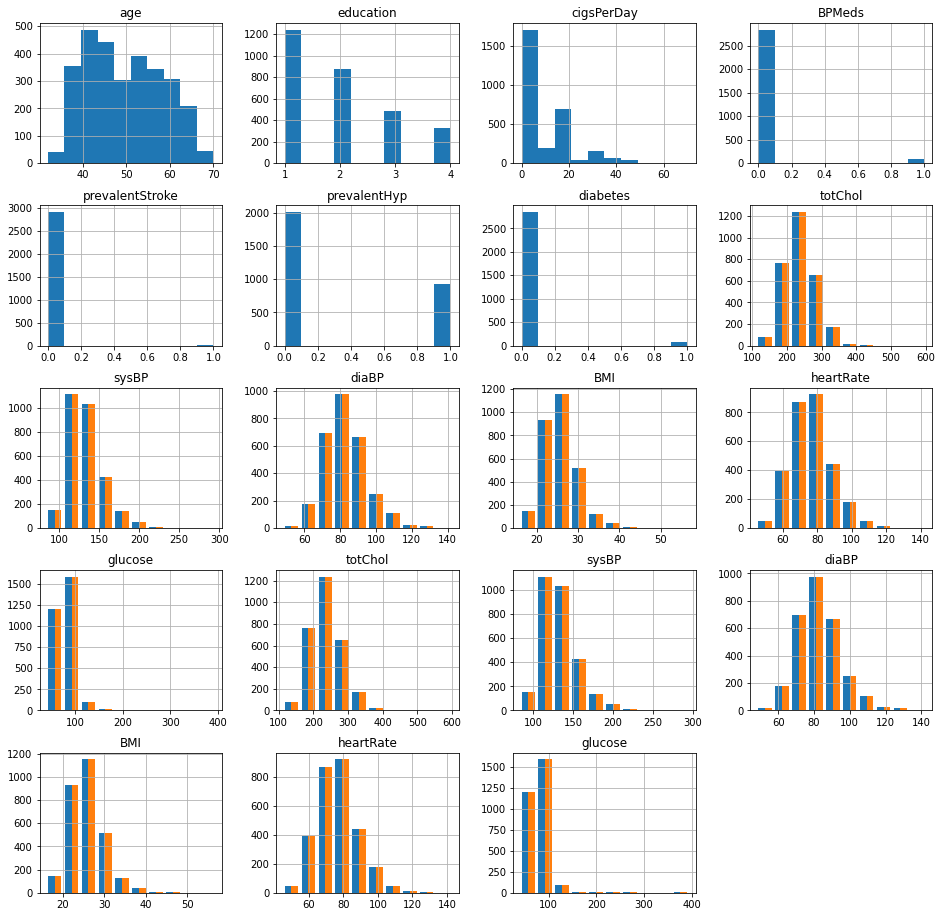

In [19]:
independent_vars.hist(figsize= (16,16))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff83deef290>]],
      dtype=object)

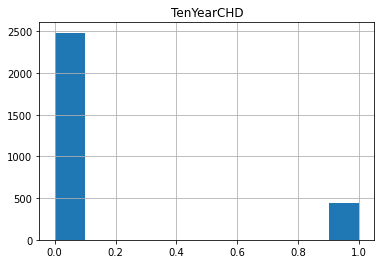

In [20]:
dependent_vars.hist()

**Checking for Outliers**

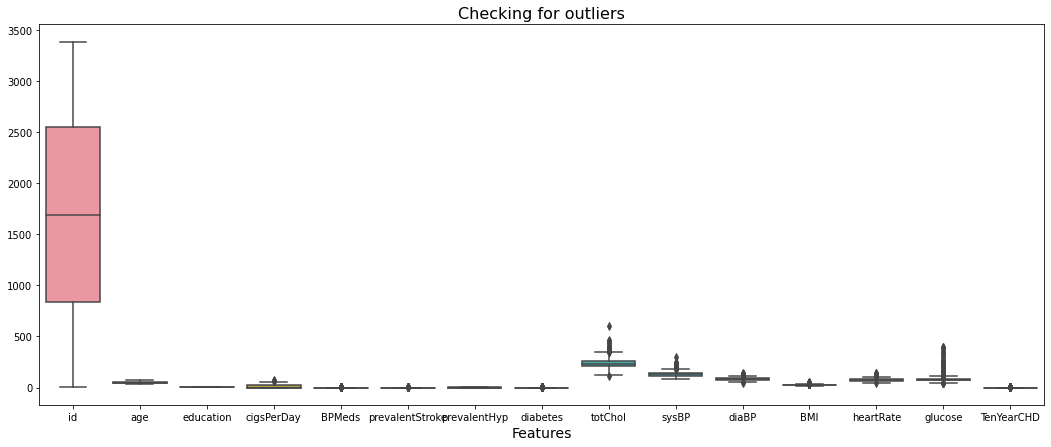

In [21]:
plt.figure(figsize=(18,7))
sns.boxplot(data=data)
plt.title('Checking for outliers', size=16)
plt.xlabel('Features', size=14)
plt.show()

**Correlation Heatmap**

In [22]:
data.corr()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.024679,-0.029438,-0.031746,0.014426,-0.034277,0.022882,0.004331,-0.015428,0.030634,0.004233,0.033410,0.027590,0.011366,0.010901
age,0.024679,1.000000,-0.161238,-0.184110,0.138570,0.049756,0.313543,0.111085,0.281156,0.405238,0.231322,0.141001,0.013947,0.108882,0.234423
education,-0.029438,-0.161238,1.000000,0.015506,-0.023534,-0.027410,-0.082675,-0.054464,-0.011575,-0.130417,-0.056034,-0.131304,-0.061501,-0.034099,-0.062442
cigsPerDay,-0.031746,-0.184110,0.015506,1.000000,-0.036866,-0.047461,-0.080570,-0.048959,-0.026606,-0.105104,-0.067483,-0.095310,0.055770,-0.064029,0.059797
BPMeds,0.014426,0.138570,-0.023534,-0.036866,1.000000,0.114107,0.260039,0.069443,0.098210,0.280788,0.206209,0.088962,0.014681,0.069125,0.092868
prevalentStroke,-0.034277,0.049756,-0.027410,-0.047461,0.114107,1.000000,0.059703,0.013866,0.002418,0.061712,0.059594,0.029168,-0.018617,0.021427,0.052014
prevalentHyp,0.022882,0.313543,-0.082675,-0.080570,0.260039,0.059703,1.000000,0.082510,0.162100,0.699240,0.612037,0.304790,0.154375,0.086143,0.169136
diabetes,0.004331,0.111085,-0.054464,-0.048959,0.069443,0.013866,0.082510,1.000000,0.069232,0.108990,0.058115,0.090249,0.046822,0.617189,0.100006
totChol,-0.015428,0.281156,-0.011575,-0.026606,0.098210,0.002418,0.162100,0.069232,1.000000,0.210685,0.165101,0.113206,0.091487,0.066703,0.106473
sysBP,0.030634,0.405238,-0.130417,-0.105104,0.280788,0.061712,0.699240,0.108990,0.210685,1.000000,0.783586,0.340782,0.180690,0.134609,0.217419


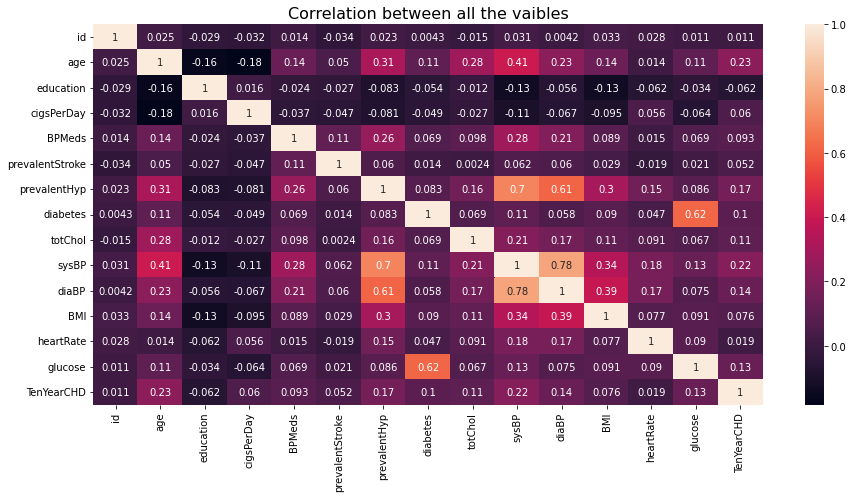

In [23]:
#visualization of the correlation in the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between all the vaibles', size=16)
plt.show()

**Predict variable (desired target)**

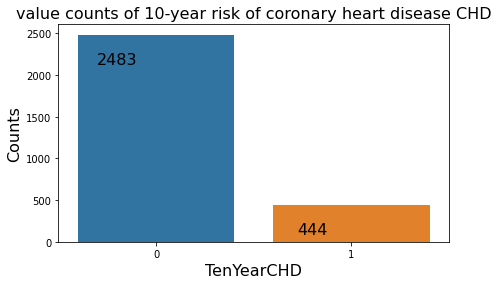

In [24]:
# value counts of 10-year risk of coronary heart disease CHD
plt.figure(figsize=(7,4))
ch = sns.countplot(data['TenYearCHD'])
plt.xlabel('TenYearCHD', size=16)
plt.ylabel('Counts', size=16)
plt.title('value counts of 10-year risk of coronary heart disease CHD', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**value counts of male and female**

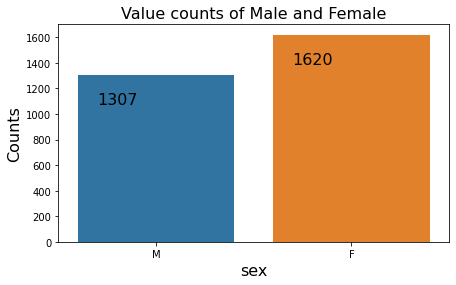

In [25]:
# value counts of male and female
plt.figure(figsize=(7,4))
ch = sns.countplot(data['sex'])
plt.xlabel('sex', size=16)
plt.ylabel('Counts', size=16)
plt.title('Value counts of Male and Female', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**value counts of person smokingt**

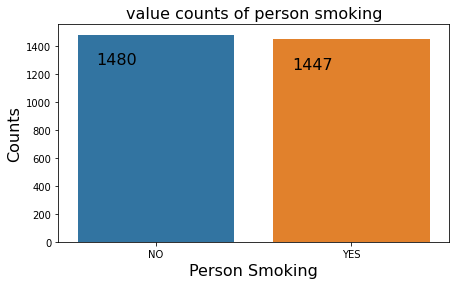

In [26]:
# value counts of person smoking
plt.figure(figsize=(7,4))
ch = sns.countplot(data['is_smoking'])
plt.xlabel('Person Smoking', size=16)
plt.ylabel('Counts', size=16)
plt.title('value counts of person smoking', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**value counts of patient was on blood pressure medication**

In [27]:
# value counts of patient was on blood pressure medication
BPMeds = data['BPMeds'].dropna(0).value_counts()
BPMeds

0.0    2839
1.0      88
Name: BPMeds, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff83e198350>,
 [Text(-0.6373922057404507, -0.8965105554656471, '0.0'),
  Text(0.6953370375618967, 0.9780114540201692, '1.0')],
 [Text(-0.34766847585842764, -0.48900575752671654, '97.0%'),
  Text(0.4056132719111064, 0.5705066815117654, '3.0%')])

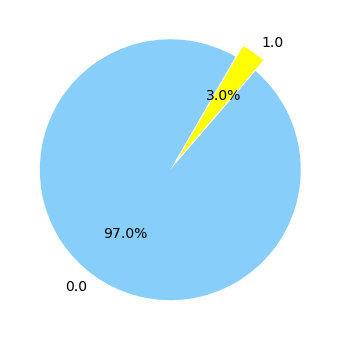

In [28]:
plt.rcParams['figure.figsize'] = 6,6
labels = data['BPMeds'].value_counts().index.tolist()
sizes = data['BPMeds'].value_counts().tolist()
colors = ['lightskyblue','yellow']
explode = (0, 0.1)
plt.pie(sizes, labels=labels,explode = (0, 0.1), colors=colors,autopct='%1.1f%%' ,startangle=60,textprops={'fontsize': 14})

**value counts of patient previously had a stroke**

In [29]:
#value counts of patient previously had a stroke
prevalentStroke = data['prevalentStroke'].value_counts()
prevalentStroke

0    2909
1      18
Name: prevalentStroke, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff83e63f8d0>,
 [Text(-0.5683006948333067, -0.9418249944931282, '0'),
  Text(0.6199644214188407, 1.0274454322127293, '1')],
 [Text(-0.3099821971818036, -0.5137227242689789, '99.4%'),
  Text(0.36164591249432365, 0.5993431687907588, '0.6%')])

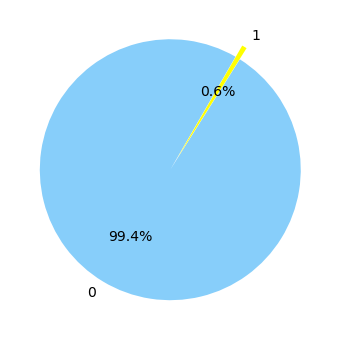

In [30]:
plt.rcParams['figure.figsize'] = 6,6
labels = data['prevalentStroke'].value_counts().index.tolist()
sizes = data['prevalentStroke'].value_counts().tolist()
colors = ['lightskyblue','yellow']
explode = (0, 0.1)
plt.pie(sizes, labels=labels,explode = (0, 0.1), colors=colors,autopct='%1.1f%%' ,startangle=60,textprops={'fontsize': 14})

**value counts of patient was hypertensive**

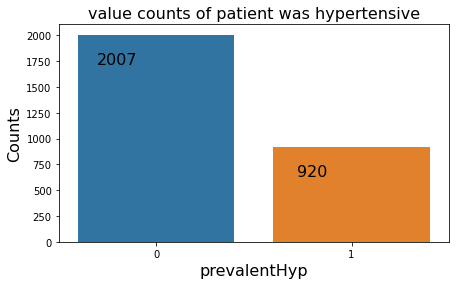

In [31]:
# value counts of patient was hypertensive
plt.figure(figsize=(7,4))
ch = sns.countplot(data['prevalentHyp'])
plt.xlabel('prevalentHyp', size=16)
plt.ylabel('Counts', size=16)
plt.title('value counts of patient was hypertensive', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**value counts of patient had diabetes**

In [32]:
#value counts of patient had diabetes
diabetes = data['diabetes'].value_counts()
diabetes

0    2848
1      79
Name: diabetes, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff83e366a10>,
 [Text(-0.6287024474481075, -0.9026257433580984, '0'),
  Text(0.6858572903044546, 0.9846825769435708, '1')],
 [Text(-0.3429286076989677, -0.49234131455896274, '97.3%'),
  Text(0.40008341934426517, 0.5743981698837496, '2.7%')])

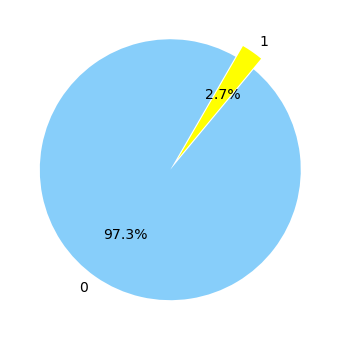

In [33]:
plt.rcParams['figure.figsize'] = 6,6
labels = data['diabetes'].value_counts().index.tolist()
sizes = data['diabetes'].value_counts().tolist()
colors = ['lightskyblue','yellow']
explode = (0, 0.1)
plt.pie(sizes, labels=labels,explode = (0, 0.1), colors=colors,autopct='%1.1f%%' ,startangle=60,textprops={'fontsize': 14})

**Value Count of Age**

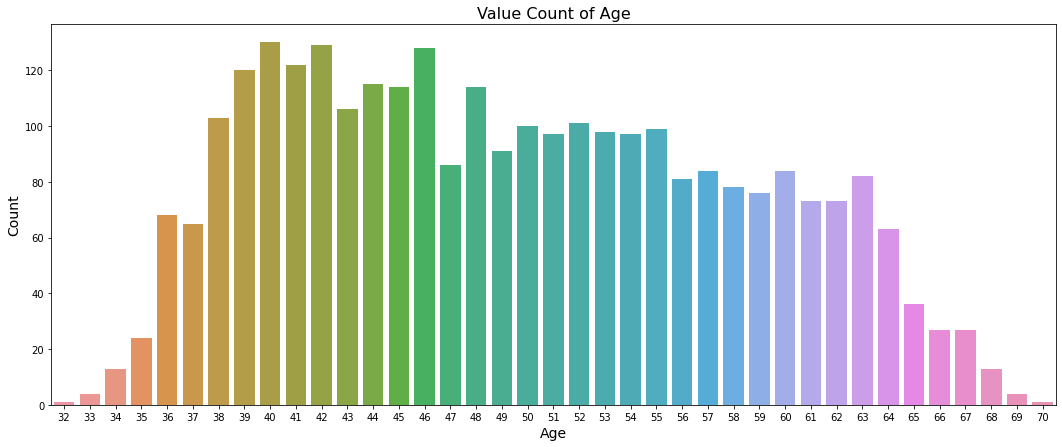

In [34]:
#value counts of age feature
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='age')
plt.title('Value Count of Age', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Age Vs Person Smoking**

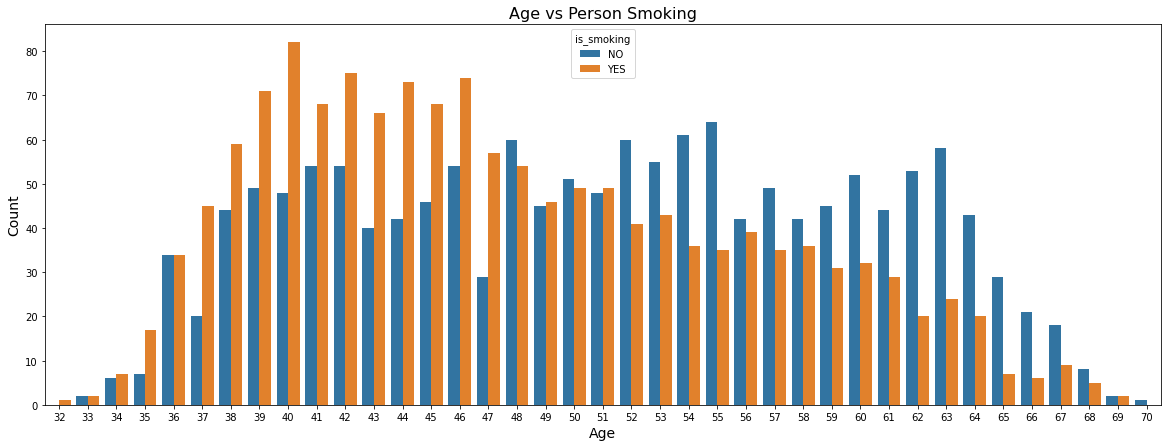

In [35]:
#visualization of person smoking on the basis of age
plt.figure(figsize=(20,7))
sns.countplot(data=data, x='age', hue='is_smoking')
plt.title('Age vs Person Smoking', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Male and Female Vs Person Smoking**

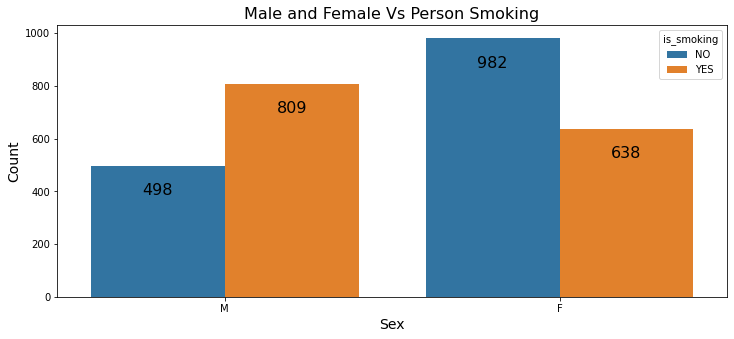

In [36]:
#visualization of person smoking on the basis of sex
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data,x='sex',  hue='is_smoking')
plt.title('Male and Female Vs Person Smoking', size=16)
plt.xlabel('Sex', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), va='top', ha='center', size=16)
plt.show()